In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
import imageio
from skimage.color import rgb2gray
from skimage import filters
from skimage import feature
import scipy.io
import scipy.ndimage as ndimage
from PIL import Image
#Rescale to 0-255 and convert to uint8

In [2]:
!pip install opencv-python

In [2]:

mypath = 'C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/ContenSimilarityTest/images_Landmass.mat'
# Draw raw
list_data = scipy.io.loadmat(mypath)['images']
# print(len(list_data))
array_data = np.array(list_data)
print('Shape of data array: ', array_data.shape)

Shape of data array:  (2000, 99, 99)


In [3]:
numImages = array_data.shape[0]
width = array_data.shape[1]
length = array_data.shape[2]

In [4]:

edge = np.zeros((numImages, width, length))
dilate = np.zeros((numImages, width, length))
for n in np.arange(numImages):# img_nmf_all
#     edge[n] = ndimage.gaussian_filter(, sigma = 1.5, order=2, mode='reflect')
    edge[n] = feature.canny( array_data[n], sigma = 1, low_threshold=0.7,high_threshold=0)
    for i in np.arange(20):
        dilate[n]= ndimage.morphology.binary_dilation(edge[n]) #, brute_force = True
for n in np.arange(numImages):# img_nmf_all
#     edge[n] = ndimage.gaussian_filter(edge[n], sigma = 0.5, order=2, mode='reflect')
    for i in np.arange(20):
        dilate[n]= ndimage.morphology.binary_dilation(edge[n], brute_force = True)

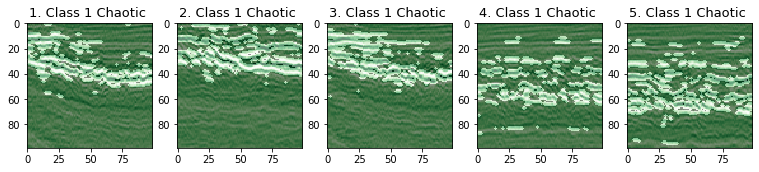

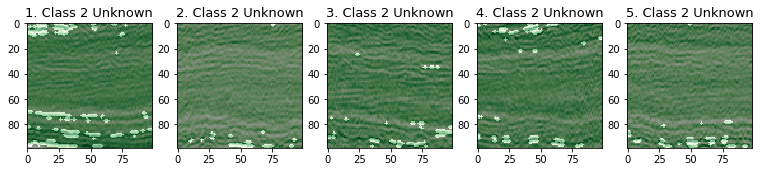

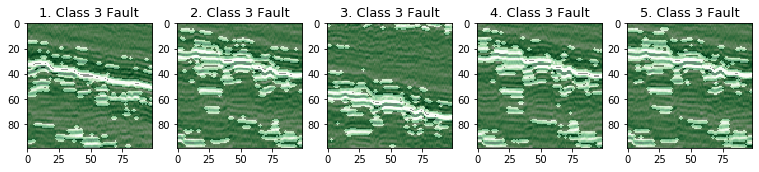

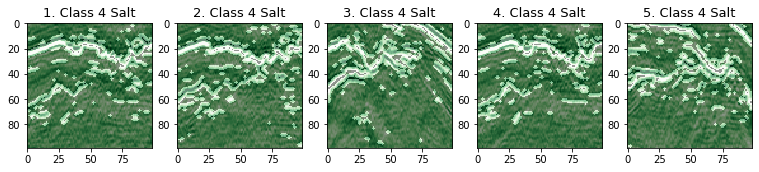

In [5]:
# fig, axarr = plt.subplots(1, 5, figsize=(13, 13))
# for ax, n in zip(axarr.flatten(), np.arange(5)):
#     ax.imshow(array_data[n+232])
#     ax.imshow(dilate[n+232], cmap='gray', alpha = 0.4)
#     ax.set_title("%i. " % (n+1) + "Class 1 Mask " , fontsize=13)
# plt.show()

fig, axarr = plt.subplots(1, 5, figsize=(13, 13))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+45], cmap='Greens')
    ax.imshow(dilate[n+45], cmap='gray', alpha = 0.4)
    ax.set_title("%i. " % (n+1) + "Class 1 Chaotic " , fontsize=13)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(13, 13))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+500+232], cmap='Greens')
    ax.imshow(dilate[n+500+232], cmap='gray', alpha = 0.4)
    ax.set_title("%i. " % (n+1) + "Class 2 Unknown", fontsize=13)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(13, 13))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+1000+232], cmap='Greens')
    ax.imshow(dilate[n+1000+232], cmap='gray', alpha = 0.4)
    ax.set_title("%i. " % (n+1) + "Class 3 Fault", fontsize=13)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(13, 13))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+1500+175], cmap='Greens')
    ax.imshow(dilate[n+1500+175], cmap='gray', alpha = 0.4)
    ax.set_title("%i. " % (n+1) + "Class 4 Salt", fontsize=13)
plt.show()


(99, 99)


C:\Users\Tsaip\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  


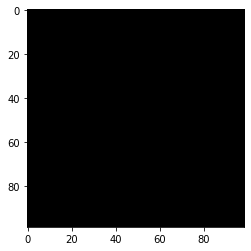

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(dilate[0])
pic2show = kmeans.cluster_centers_[kmeans.labels_]
print(pic2show.shape)
# cluster_pic = pic2show.reshape(99,99)
plt.imshow(pic2show, cmap = 'gray')

In [6]:
for n in np.arange(500):
    mask_c = dilate[n]
    mask_o = dilate[n+500]
    mask_f = dilate[n+1000]
    mask_s = dilate[n+1500]
    rescaled1 = (255.0 / mask_c.max() * (mask_c - mask_c.min())).astype(np.uint8)
    rescaled2 = (255.0 / mask_o.max() * (mask_o - mask_o.min())).astype(np.uint8)
    rescaled3 = (255.0 / mask_f.max() * (mask_f - mask_f.min())).astype(np.uint8)
    rescaled4 = (255.0 / mask_s.max() * (mask_s - mask_s.min())).astype(np.uint8)
    im1 = Image.fromarray(rescaled1)
    im2 = Image.fromarray(rescaled2)
    im3 = Image.fromarray(rescaled3)
    im4 = Image.fromarray(rescaled4)
    im1.save('C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/LANDMASS_Mask/chaotic/Mask %i chaotic.png'
             %(n+1))
    im2.save('C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/LANDMASS_Mask/other/Mask %i other.png'
             %(n+1))
    im3.save('C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/LANDMASS_Mask/fault/Mask %i fault.png'
             %(n+1))
    im4.save('C:/Users/Tsaip/OneDrive - Imperial College London/Ovation Data Internship 2020/Data/LANDMASS_Mask/salt/Mask %i Salt.png'
             %(n+1))
    
    

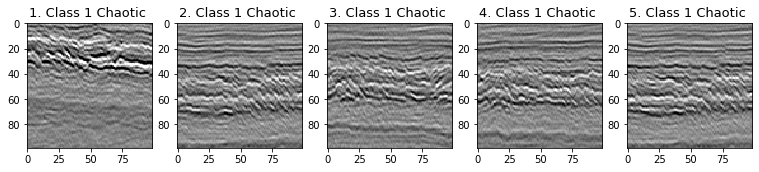

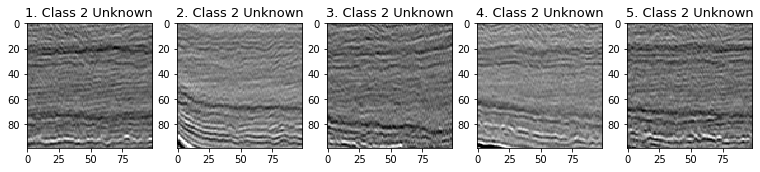

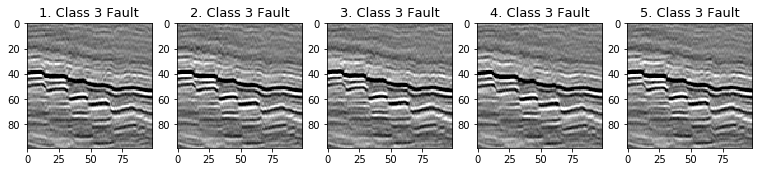

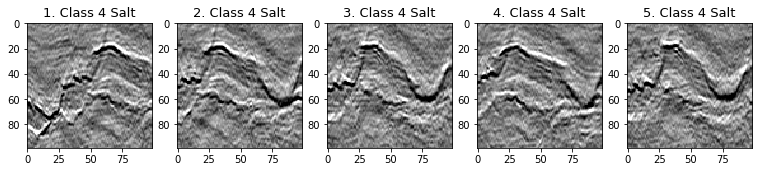

In [9]:
fig, axarr = plt.subplots(1, 5, figsize=(13, 13))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n], cmap='gray')
    ax.set_title("%i. " % (n+1) + "Class 1 Chaotic " , fontsize=13)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(13, 13))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+500], cmap='gray')
    ax.set_title("%i. " % (n+1) + "Class 2 Unknown", fontsize=13)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(13, 13))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+1000], cmap='gray')
    ax.set_title("%i. " % (n+1) + "Class 3 Fault", fontsize=13)
plt.show()
fig, axarr = plt.subplots(1, 5, figsize=(13, 13))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    ax.imshow(array_data[n+1500], cmap='gray')
    ax.set_title("%i. " % (n+1) + "Class 4 Salt", fontsize=13)
plt.show()

In [10]:
coverage = np.sum(mask_data_t, axis = 1)/(width*length) # Take the sum of each mask and devided by the image size

mask_data = np.zeros((numImg, width, length))
mask_data = np.reshape(mask_data_t, (numImg, width, length)) # For validate accuracy

salt_data = grayscale_data[coverage > 0.1]
salt_mask = mask_data[coverage > 0.1]
other_data = grayscale_data[coverage <= 0.1]
other_mask = mask_data[coverage <= 0.1]
print(salt_data.shape)




NameError: name 'mask_data_t' is not defined

In [ ]:
# Use cannyedge or sobel to extract the feature line.Make it ground truth
edge = np.zeros((numImages, width,length))
dilate = np.zeros((numImages, width,length))
for n in np.arange(numImages):# img_nmf_all
    edge[n] = feature.canny(salt_data[n], sigma = 1, low_threshold=0.25,high_threshold=0)
    for i in np.arange(5):
        dilate[n]= ndimage.morphology.binary_dilation(edge[n])

In [ ]:
img = cv2.imread('LANDMASS_Salt.png', 0)

plt.imshow(img)
# plt.imshow(mask_data[20])


edge = feature.canny(img, sigma = 0.5, low_threshold=300,high_threshold=50)
# edge = feature.canny(salt_data[102],sigma=0.1)
plt.imshow(edge, cmap='gray', alpha = 0.3)
edge.shape

In [ ]:
dilate = edge
print(dilate)
# struct2 = ndimage.generate_binary_structure(2, 2)
fig, axarr = plt.subplots(1, 5, figsize=(13, 13))
for ax, n in zip(axarr.flatten(), np.arange(5)):
    dilate= ndimage.morphology.binary_dilation(dilate,struct2)
    ax.imshow(dilate, cmap='gray')
    ax.set_title("%i. " % (n+1) + "Class 1 Salt " , fontsize=13)
plt.show()


In [ ]:
img = cv2.imread('LANDMASS_Salt.png', 0)
edges = cv2.Canny(img,500, 100)

f, [ax1,ax2] = plt.subplots(1,2,figsize=(15,15))
ax1.imshow(img,cmap = 'gray')
ax1.set_title('Original Image')
ax2.imshow(edges,cmap = 'gray')
ax2.set_title('Edge Image')

In [ ]:
img = cv2.imread('LANDMASS_Salt.png', 0)
edges = cv2.Canny(img,500, 100)

f, [ax1,ax2] = plt.subplots(1,2,figsize=(10,10))
ax1.imshow(img,cmap = 'gray')
ax1.set_title('Original Image')
ax2.imshow(edges,cmap = 'gray')
ax2.set_title('Edge Image')

In [ ]:
img = cv2.imread('LANDMASS_Salt.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
plt.imshow(blur_gray,cmap='gray')

In [ ]:
low_threshold = 400
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='gray')

In [ ]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50# minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

In [ ]:
plt.imshow(line_image)

In [ ]:
# Draw the lines on the  image
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
plt.imshow(lines_edges)